In [1]:
import sys

from PyQt5.QtCore import Qt
from PyQt5.QtWidgets import QApplication, QWidget, QLabel, QPushButton, QVBoxLayout
from PyQt5.QtGui import QPainter, QColor, QBrush

class PaintWidget(QWidget):
    def __init__(self):
        super().__init__()

        self.initUI()

    def initUI(self):
        self.setGeometry(300, 300, 300, 200)
        self.setWindowTitle('Paint')

        layout = QVBoxLayout()
        self.setLayout(layout)

        self.color_label = QLabel('Color:')
        self.color_label.setAlignment(Qt.AlignCenter)
        layout.addWidget(self.color_label)

        self.color_button = QPushButton('Change Color')
        self.color_button.clicked.connect(self.changeColor)
        layout.addWidget(self.color_button)

        self.paint_area = QWidget()
        self.paint_area.setStyleSheet('background-color: white')
        self.paint_area.setFixedSize(200, 200)
        layout.addWidget(self.paint_area)

    def changeColor(self):
        color = QColorDialog.getColor()
        if color.isValid():
            self.color_label.setStyleSheet('color: ' + color.name())
            self.color_button.setStyleSheet('background-color: ' + color.name())
            self.paint_area.setStyleSheet('background-color: ' + color.name())

if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = PaintWidget()
    ex.show()
    sys.exit(app.exec_())

NameError: name 'QColorDialog' is not defined

SystemExit: 0

C:\Users\joshb\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [9]:
import sys
from PyQt5.QtWidgets import QApplication, QMainWindow, QLabel, QPushButton, QWidget
from PyQt5.QtGui import QPainter, QColor, QPen

class PaintApp(QMainWindow):
    def __init__(self):
        super().__init__()

        self.setGeometry(100, 100, 800, 600)
        self.setWindowTitle("Paint Application")

        self.color = QColor(0, 0, 0)
        self.pen_width = 1

        self.create_ui()

    def create_ui(self):
        self.label = QLabel("Select Color", self)
        self.label.move(10, 10)

        self.button = QPushButton("Change Color", self)
        self.button.move(10, 30)
        self.button.clicked.connect(self.change_color)

        self.widget = QWidget(self)
        self.setCentralWidget(self.widget)
        self.widget.setMouseTracking(True)

    def change_color(self):
        color = QColorDialog.getColor(self.color, self)
        if color.isValid():
            self.color = color
            self.label.setText("Selected Color: " + self.color.name())

    def paintEvent(self, event):
        painter = QPainter(self.widget)
        painter.setPen(QPen(self.color, self.pen_width, Qt.SolidLine))
        painter.drawLine(self.last_pos.x(), self.last_pos.y(), event.pos().x(), event.pos().y())

    def mouseMoveEvent(self, event):
        if self.widget.underMouse():
            self.last_pos = event.pos()
            self.widget.update()

if __name__ == "__main__":
    app = QApplication(sys.argv)
    window = PaintApp()
    window.show()
    sys.exit(app.exec_())

NameError: name 'Qt' is not defined

NameError: name 'Qt' is not defined

NameError: name 'Qt' is not defined

NameError: name 'Qt' is not defined

SystemExit: 0

C:\Users\joshb\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
import sys
from PyQt5.QtWidgets import QApplication, QMainWindow, QAction
from PyQt5.QtGui import QPainter, QBrush, QColor
from PyQt5.QtCore import Qt

class PaintWindow(QMainWindow):
    def __init__(self):
        super().__init__()

        self.initUI()

    def initUI(self):
        self.setGeometry(100, 100, 400, 300)
        self.setWindowTitle('Paint Application')

        self.drawing = False
        self.brushSize = 2
        self.brushColor = QColor(0, 0, 0)

        self.show()

    def paintEvent(self, event):
        painter = QPainter(self)
        painter.setRenderHint(QPainter.Antialiasing)
        painter.setPen(Qt.NoPen)
        painter.setBrush(QBrush(self.brushColor, Qt.SolidPattern))

        if self.drawing:
            painter.drawEllipse(event.rect())

    def mousePressEvent(self, event):
        if event.button() == Qt.LeftButton:
            self.drawing = True
            self.update()

    def mouseMoveEvent(self, event):
        if self.drawing:
            self.update()

    def mouseReleaseEvent(self, event):
        if event.button() == Qt.LeftButton and self.drawing:
            self.drawing = False
            self.update()

if __name__ == '__main__':
    app = QApplication(sys.argv)
    window = PaintWindow()
    sys.exit(app.exec_())

: 

In [ ]:
import sys
from PyQt5.QtWidgets import QApplication, QWidget, QColorDialog
from PyQt5.QtCore import Qt
from PyQt5.QtGui import QPalette, QColor, QPainter

class Paint(QWidget):
    def __init__(self):
        super().__init__()

        self.setWindowTitle('Paint')
        self.setGeometry(100, 100, 600, 400)

        self.pen_color = Qt.black
        self.pen_width = 2

    def mousePressEvent(self, event):
        if event.button() == Qt.LeftButton:
            self.drawing = True
            self.last_point = event.pos()
            self.update()

    def mouseMoveEvent(self, event):
        if self.drawing:
            self.draw_line_to(event.pos())

    def mouseReleaseEvent(self, event):
        if event.button() == Qt.LeftButton:
            self.drawing = False

    def draw_line_to(self, end_point):
        painter = QPainter(self)
        painter.setPen(Qt.NoPen)
        painter.setBrush(self.pen_color)

        painter.drawLine(self.last_point.x(), self.last_point.y(),
                          end_point.x(), end_point.y())

        self.last_point = end_point
        self.update()

    def change_color(self):
        color = QColorDialog.getColor()
        if color.isValid():
            self.pen_color = color

    def change_width(self):
        width, ok = QInputDialog.getInt(self, 'Width', 'Enter pen width:')
        if ok:
            self.pen_width = width

    def contextMenuEvent(self, event):
        menu = QMenu(self)

        change_color_action = menu.addAction('Change color')
        change_width_action = menu.addAction('Change width')

        action = menu.exec_(self.mapToGlobal(event.pos()))

        if action == change_color_action:
            self.change_color()
        elif action == change_width_action:
            self.change_width()

app = QApplication(sys.argv)

p = Paint()
p.show()

sys.exit(app.exec_())

: 

In [3]:
import ipywidgets as widgets
from IPython.display import display

class Paint:
    def __init__(self):
        self.color = 'black'
        self.width = 2
        self.points = []

        self.canvas = widgets.Canvas(
            width='100%',
            height='100%',
            layout=widgets.Layout(border='solid 1px black')
        )

        self.color_selector = widgets.ColorPicker(
            value=self.color,
            layout=widgets.Layout(width='100px')
        )

        self.width_selector = widgets.IntSlider(
            value=self.width,
            min=1,
            max=10,
            layout=widgets.Layout(width='100px')
        )

        display(self.canvas)
        display(self.color_selector)
        display(self.width_selector)

        self.color_selector.observe(self.on_color_change, 'value')
        self.width_selector.observe(self.on_width_change, 'value')

    def on_color_change(self, change):
        self.color = change['new']

    def on_width_change(self, change):
        self.width = change['new']

    def draw(self, x, y):
        self.points.append((x, y))
        self.canvas.send_json({
            'type': 'draw',
            'points': self.points,
            'color': self.color,
            'width': self.width
        })

paint = Paint()

AttributeError: module 'ipywidgets' has no attribute 'Canvas'

In [4]:
import ipywidgets as widgets

class Paint:
    def __init__(self):
        self.points = []

    def draw_line_to(self, x, y):
        self.points.append((x, y))
        self.display()

    def display(self):
        output = widgets.Output()
        output.clear_output(wait=True)
        with output:
            plt.figure(figsize=(10, 10))
            plt.gca().invert_yaxis()
            plt.gca().set_aspect('equal', adjustable='box')
            if self.points:
                plt.plot([x for x, y in self.points], [y for x, y in self.points], 'ro-')
                plt.plot([x for x, y in self.points], [y for x, y in self.points], 'bo-')
                plt.plot([x for x, y in self.points], [y for x, y in self.points], 'go-')
            display(output)

p = Paint()

interact(p.draw_line_to, x=widgets.IntSlider(min=0, max=600, step=1), y=widgets.IntSlider(min=0, max=400, step=1))

NameError: name 'interact' is not defined

In [5]:
import ipywidgets as widgets
from IPython.display import display

class Paint:
    def __init__(self):
        self.color = 'black'
        self.width = 2
        self.points = []

        self.output = widgets.Output()

        self.color_selector = widgets.ColorPicker(
            value=self.color,
            layout=widgets.Layout(width='100px')
        )

        self.width_selector = widgets.IntSlider(
            value=self.width,
            min=1,
            max=10,
            layout=widgets.Layout(width='100px')
        )

        display(self.output)
        display(self.color_selector)
        display(self.width_selector)

        self.color_selector.observe(self.on_color_change, 'value')
        self.width_selector.observe(self.on_width_change, 'value')

    def on_color_change(self, change):
        self.color = change['new']

    def on_width_change(self, change):
        self.width = change['new']

    def draw(self, x, y):
        self.points.append((x, y))
        with self.output:
            print('Drawing...')

paint = Paint()

Output()

ColorPicker(value='black', layout=Layout(width='100px'))

IntSlider(value=2, layout=Layout(width='100px'), max=10, min=1)

In [6]:
from svgwrite import Drawing
import ipywidgets as widgets
from IPython.display import SVG

class Paint:
    def __init__(self):
        self.color = 'black'
        self.width = 2
        self.points = []

        self.drawing = Drawing()
        self.group = self.drawing.add(self.drawing.g(id='group'))

        self.color_selector = widgets.ColorPicker(
            value=self.color,
            layout=widgets.Layout(width='100px')
        )

        self.width_selector = widgets.IntSlider(
            value=self.width,
            min=1,
            max=10,
            layout=widgets.Layout(width='100px')
        )

        display(self.color_selector)
        display(self.width_selector)

        self.color_selector.observe(self.on_color_change, 'value')
        self.width_selector.observe(self.on_width_change, 'value')

    def on_color_change(self, change):
        self.color = change['new']

    def on_width_change(self, change):
        self.width = change['new']

    def draw(self, x, y):
        self.points.append((x, y))
        if self.points:
            self.group.add(self.drawing.line(self.points, stroke=self.color, stroke_width=self.width))
            display(SVG(self.drawing.tostring()))

ModuleNotFoundError: No module named 'svgwrite'

In [7]:
import ipywidgets as widgets
from IPython.display import display

class Paint:
    def __init__(self):
        self.color = 'black'
        self.width = 2
        self.points = []

        self.canvas = widgets.Output()

        self.color_selector = widgets.ColorPicker(
            value=self.color,
            layout=widgets.Layout(width='100px')
        )

        self.width_selector = widgets.IntSlider(
            value=self.width,
            min=1,
            max=10,
            layout=widgets.Layout(width='100px')
        )

        display(self.canvas)
        display(self.color_selector)
        display(self.width_selector)

        self.color_selector.observe(self.on_color_change, 'value')
        self.width_selector.observe(self.on_width_change, 'value')

    def on_color_change(self, change):
        self.color = change['new']

    def on_width_change(self, change):
        self.width = change['new']

    def draw(self, x, y):
        self.points.append((x, y))
        with self.canvas:
            display(widgets.HTML(f''))

paint = Paint()

Output()

ColorPicker(value='black', layout=Layout(width='100px'))

IntSlider(value=2, layout=Layout(width='100px'), max=10, min=1)

In [8]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

class Paint:
    def __init__(self):
        self.color = 'black'
        self.width = 2
        self.points = []
        self.canvas = None

        self.color_selector = widgets.ColorPicker(
            value=self.color,
            layout=widgets.Layout(width='100px')
        )

        self.width_selector = widgets.IntSlider(
            value=self.width,
            min=1,
            max=10,
            layout=widgets.Layout(width='100px')
        )

        display(self.color_selector)
        display(self.width_selector)

        self.color_selector.observe(self.on_color_change, 'value')
        self.width_selector.observe(self.on_width_change, 'value')

        self.clear_button = widgets.Button(description="Clear")
        self.clear_button.on_click(self.clear_canvas)
        display(self.clear_button)

        self.create_canvas()

    def on_color_change(self, change):
        self.color = change['new']

    def on_width_change(self, change):
        self.width = change['new']

    def clear_canvas(self, button):
        self.points = []
        self.draw()

    def draw(self, x=None, y=None):
        if self.canvas is None:
            self.create_canvas()
        if x is not None and y is not None:
            self.points.append((x, y))
        if self.points:
            x, y = zip(*self.points)
            plt.figure(figsize=(8, 8))
            plt.scatter(x, y, c=self.color, s=self.width*10)
            plt.axis('off')
            plt.show()

    def create_canvas(self):
        self.canvas = widgets.Output()
        display(self.canvas)

paint = Paint()

ColorPicker(value='black', layout=Layout(width='100px'))

IntSlider(value=2, layout=Layout(width='100px'), max=10, min=1)

Button(description='Clear', style=ButtonStyle())

Output()

In [9]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

class Paint:
    def __init__(self):
        self.color = 'black'
        self.width = 2
        self.points = []
        self.canvas = None

        self.color_selector = widgets.ColorPicker(
            value=self.color,
            layout=widgets.Layout(width='100px')
        )

        self.width_selector = widgets.IntSlider(
            value=self.width,
            min=1,
            max=10,
            layout=widgets.Layout(width='100px')
        )

        display(self.color_selector)
        display(self.width_selector)

        self.color_selector.observe(self.on_color_change, 'value')
        self.width_selector.observe(self.on_width_change, 'value')

        self.create_canvas()

    def on_color_change(self, change):
        self.color = change['new']

    def on_width_change(self, change):
        self.width = change['new']

    def create_canvas(self):
        self.canvas = widgets.Output()
        display(self.canvas)

    def draw(self, x=None, y=None):
        if self.canvas is None:
            self.create_canvas()
        if x is not None and y is not None:
            self.points.append((x, y))
        if self.points:
            x, y = zip(*self.points)
            plt.figure(figsize=(8, 8))
            plt.scatter(x, y, c=self.color, s=self.width*10)
            plt.axis('off')
            plt.show()

    def on_click(self, click):
        if click.button == 1:
            self.draw(click.x, click.y)

    def clear_canvas(self, button):
        self.points = []
        self.draw()

paint = Paint()

ColorPicker(value='black', layout=Layout(width='100px'))

IntSlider(value=2, layout=Layout(width='100px'), max=10, min=1)

Output()

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interactive

# Define a function to plot
def plot_func(frequency):
    plt.figure(figsize=(6,4))
    x = np.linspace(0, 2*np.pi, 1000)
    y = np.sin(frequency * x)
    plt.plot(x, y)
    plt.ylim(-1.1, 1.1)
    plt.show()

# Create an interactive plot with a slider
interactive_plot = interactive(plot_func, frequency=(1, 10, 0.1))
interactive_plot

interactive(children=(FloatSlider(value=5.0, description='frequency', max=10.0, min=1.0), Output()), _dom_clas…

In [11]:
import ipywidgets as widgets
from IPython.display import display

# Define a slider widget with a range from 0 to 100
slider = widgets.IntSlider(min=0, max=100, step=1, value=50)

# Display the slider
display(slider)

# Print the value of the slider
print("Slider value:", slider.value)

IntSlider(value=50)

Slider value: 50


In [12]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd

class ExpenseTracker:
    def __init__(self):
        self.expenses = pd.DataFrame(columns=['Date', 'Category', 'Amount'])

        self.date_widget = widgets.DatePicker()
        self.category_widget = widgets.Textarea()
        self.amount_widget = widgets.FloatText()

        self.output = widgets.Output()

        self.add_button = widgets.Button(description='Add Expense')
        self.add_button.on_click(self.add_expense)

        self.display_button = widgets.Button(description='Display Expenses')
        self.display_button.on_click(self.display_expenses)

    def add_expense(self, _):
        date = self.date_widget.value
        category = self.category_widget.value
        amount = self.amount_widget.value

        new_expense = pd.DataFrame({'Date': [date], 'Category': [category], 'Amount': [amount]})

        self.expenses = pd.concat([self.expenses, new_expense], ignore_index=True)

        with self.output:
            self.output.clear_output()
            display(self.expenses)

    def display_expenses(self, _):
        with self.output:
            self.output.clear_output()
            display(self.expenses)

    def run(self):
        display(self.date_widget, self.category_widget, self.amount_widget, self.add_button, self.display_button, self.output)


tracker = ExpenseTracker()
tracker.run()

C:\Users\joshb\AppData\Local\Temp\ipykernel_37236\3581601062.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


DatePicker(value=None, step=1)

Textarea(value='')

FloatText(value=0.0)

Button(description='Add Expense', style=ButtonStyle())

Button(description='Display Expenses', style=ButtonStyle())

Output()

C:\Users\joshb\AppData\Local\Temp\ipykernel_37236\3581601062.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.expenses = pd.concat([self.expenses, new_expense], ignore_index=True)


In [13]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt

class ExpenseTracker:
    def __init__(self):
        self.expenses = pd.DataFrame(columns=['Date', 'Category', 'Amount'])

        self.date_widget = widgets.DatePicker()
        self.category_widget = widgets.Textarea()
        self.amount_widget = widgets.FloatText()

        self.output = widgets.Output()
        self.output_chart = widgets.Output()

        self.add_button = widgets.Button(description='Add Expense')
        self.add_button.on_click(self.add_expense)

        self.display_button = widgets.Button(description='Display Expenses')
        self.display_button.on_click(self.display_expenses)

        self.display_chart_button = widgets.Button(description='Display Expenses Chart')
        self.display_chart_button.on_click(self.display_expenses_chart)

    def add_expense(self, _):
        date = self.date_widget.value
        category = self.category_widget.value
        amount = self.amount_widget.value

        new_expense = pd.DataFrame({'Date': [date], 'Category': [category], 'Amount': [amount]})

        self.expenses = pd.concat([self.expenses, new_expense], ignore_index=True)

        with self.output:
            self.output.clear_output()
            display(self.expenses)

    def display_expenses(self, _):
        with self.output:
            self.output.clear_output()
            display(self.expenses)

    def display_expenses_chart(self, _):
        grouped = self.expenses.groupby('Category')['Amount'].sum()
        labels = grouped.index
        sizes = grouped.values

        with self.output_chart:
            self.output_chart.clear_output()
            _, ax = plt.subplots(figsize=(8, 6))
            ax.pie(sizes, labels=labels, autopct='%1.1f%%')
            ax.axis('equal')
            plt.show()

    def run(self):
        display(self.date_widget, self.category_widget, self.amount_widget, self.add_button, self.display_button, self.display_chart_button, self.output, self.output_chart)


tracker = ExpenseTracker()
tracker.run()

DatePicker(value=None, step=1)

Textarea(value='')

FloatText(value=0.0)

Button(description='Add Expense', style=ButtonStyle())

Button(description='Display Expenses', style=ButtonStyle())

Button(description='Display Expenses Chart', style=ButtonStyle())

Output()

Output()

C:\Users\joshb\AppData\Local\Temp\ipykernel_37236\3262073153.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.expenses = pd.concat([self.expenses, new_expense], ignore_index=True)


In [14]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt

class ExpenseTracker:
    def __init__(self):
        self.expenses = pd.DataFrame(columns=['Date', 'Category', 'Amount'])

        self.date_widget = widgets.DatePicker()
        self.category_widget = widgets.Textarea()
        self.amount_widget = widgets.FloatText()

        self.output = widgets.Output()

        self.add_button = widgets.Button(description='Add Expense')
        self.add_button.on_click(self.add_expense)

        self.display_button = widgets.Button(description='Display Expenses')
        self.display_button.on_click(self.display_expenses)

    def add_expense(self, _):
        date = self.date_widget.value
        category = self.category_widget.value
        amount = self.amount_widget.value

        new_expense = pd.DataFrame({'Date': [date], 'Category': [category], 'Amount': [amount]})

        self.expenses = pd.concat([self.expenses, new_expense], ignore_index=True)

        with self.output:
            self.output.clear_output()
            display(self.expenses)

    def display_expenses(self, _):
        with self.output:
            self.output.clear_output()

            # Group by category and sum amount
            grouped_expenses = self.expenses.groupby('Category')['Amount'].sum()

            # Create a pie chart
            plt.figure(figsize=(8, 6))
            plt.pie(grouped_expenses, labels=grouped_expenses.index, autopct='%1.1f%%')
            plt.title('Expenses by Category')
            plt.show()

    def run(self):
        display(self.date_widget, self.category_widget, self.amount_widget, self.add_button, self.display_button, self.output)


tracker = ExpenseTracker()
tracker.run()

DatePicker(value=None, step=1)

Textarea(value='')

FloatText(value=0.0)

Button(description='Add Expense', style=ButtonStyle())

Button(description='Display Expenses', style=ButtonStyle())

Output()

C:\Users\joshb\AppData\Local\Temp\ipykernel_37236\1157883949.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.expenses = pd.concat([self.expenses, new_expense], ignore_index=True)


In [15]:
import pygame

# Initialize Pygame
pygame.init()

# Set up the display
display_width = 800
display_height = 600
display = pygame.display.set_mode((display_width, display_height))

# Set up the polygon
poly_points = [(100, 100), (200, 150), (250, 200), (150, 250), (100, 200)]
poly_color = (255, 0, 0)

# Set up the collision rectangle
collision_rect = pygame.Rect(300, 300, 100, 100)

# Game loop
while True:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()

    # Draw the polygon
    pygame.draw.polygon(display, poly_color, poly_points)

    # Draw the collision rectangle
    pygame.draw.rect(display, (0, 255, 0), collision_rect)

    # Check for collision
    if collision_rect.colliderect(pygame.Rect(poly_points)):
        print("Collision detected!")

    # Update the display
    pygame.display.flip()
    pygame.time.Clock().tick(60)

pygame 2.5.2 (SDL 2.28.3, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


TypeError: Argument must be rect style object

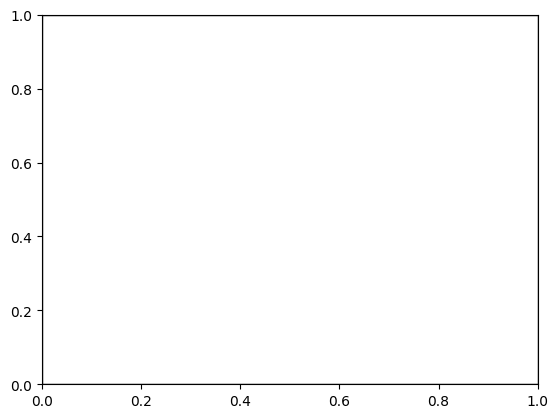

: 

In [16]:
import matplotlib.pyplot as plt
from ipywidgets import interactive
import numpy as np

# Define the polygon vertices
vertices = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the polygon
ax.add_patch(plt.Polygon(vertices, closed=True, fill=None, edgecolor='black'))

# Set the limits of the axis
ax.set_xlim(vertices.min(axis=0)[0], vertices.max(axis=0)[0])
ax.set_ylim(vertices.min(axis=0)[1], vertices.max(axis=0)[1])

# Create an interactive plot
interactive_plot = interactive(fig, _dom_classes=['widget-interactive'])

# Display the plot
interactive_plot


def is_collision(poly1, poly2):
    """
    Check if two polygons are colliding.

    Parameters:
    poly1 (list of tuples): Vertices of the first polygon.
    poly2 (list of tuples): Vertices of the second polygon.

    Returns:
    bool: True if the polygons are colliding, False otherwise.
    """
    # Calculate the bounding boxes of the polygons
    x_min1, y_min1 = min(poly1[:, 0]), min(poly1[:, 1])
    x_max1, y_max1 = max(poly1[:, 0]), max(poly1[:, 1])
    x_min2, y_min2 = min(poly2[:, 0]), min(poly2[:, 1])
    x_max2, y_max2 = max(poly2[:, 0]), max(poly2[:, 1])

    # Check if the bounding boxes are overlapping
    if x_max1 < x_min2 or x_min1 > x_max2 or y_max1 < y_min2 or y_min1 > y_max2:
        return False

    # Check if any edge of the first polygon intersects with any edge of the second polygon
    for i in range(len(poly1)):
        for j in range(len(poly2)):
            if is_intersection(poly1[i], poly1[(i+1)%len(poly1)], poly2[j], poly2[(j+1)%len(poly2)]):
                return True

    return False

def is_intersection(p1, p2, p3, p4):
    """
    Check if two line segments are intersecting.

    Parameters:
    p1, p2 (tuple): Endpoints of the first line segment.
    p3, p4 (tuple): Endpoints of the second line segment.

    Returns:
    bool: True if the line segments are intersecting, False otherwise.
    """
    # Check if the line segments are parallel
    if (p2[0] - p1[0]) * (p4[1] - p3[1]) == (p2[1] - p1[1]) * (p4[0] - p3[0]):
        return False

    # Check if the line segments are intersecting
    t = ((p4[0] - p3[0]) * (p1[1] - p3[1]) - (p4[1] - p3[1]) * (p1[0] - p3[0])) / \
        ((p2[0] - p1[0]) * (p4[1] - p3[1]) - (p2[1] - p1[1]) * (p4[0] - p3[0]))
    if t < 0 or t > 1:
        return False

    u = ((p2[0] - p1[0]) * (p1[1] - p3[1]) - (p2[1] - p1[1]) * (p1[0] - p3[0])) / \
        ((p2[0] - p1[0]) * (p4[1] - p3[1]) - (p2[1] - p1[1]) * (p4[0] - p3[0]))
    if u < 0 or u > 1:
        return False

    return True

In [4]:
import math

def polygon_collision(poly1, poly2):
    """
    Check if two polygons collide.

    Args:
        poly1, poly2: Lists of tuples representing the vertices of the polygons.

    Returns:
        True if the polygons collide, False otherwise.
    """
    # Convert the polygon vertices into a list of edges
    edges1 = [(poly1[i], poly1[(i + 1) % len(poly1)]) for i in range(len(poly1))]
    edges2 = [(poly2[i], poly2[(i + 1) % len(poly2)]) for i in range(len(poly2))]

    # Check if any edge from poly1 intersects with any edge from poly2
    for edge1 in edges1:
        for edge2 in edges2:
            if intersect(edge1, edge2):
                return True

    # Check if any vertex of poly1 is inside poly2
    for vertex in poly1:
        if point_in_polygon(vertex, poly2):
            return True

    # Check if any vertex of poly2 is inside poly1
    for vertex in poly2:
        if point_in_polygon(vertex, poly1):
            return True

    return False

def intersect(edge1, edge2):
    """
    Check if two line segments intersect.

    Args:
        edge1, edge2: Tuples of two points representing the line segments.

    Returns:
        True if the line segments intersect, False otherwise.
    """
    p1, p2 = edge1
    p3, p4 = edge2

    denom = (p4[1] - p3[1]) * (p2[0] - p1[0]) - (p4[0] - p3[0]) * (p2[1] - p1[1])

    if denom == 0:
        return False

    ua = ((p4[0] - p3[0]) * (p1[1] - p3[1]) - (p4[1] - p3[1]) * (p1[0] - p3[0])) / denom
    ub = ((p2[0] - p1[0]) * (p1[1] - p3[1]) - (p2[1] - p1[1]) * (p1[0] - p3[0])) / denom

    return 0 <= ua <= 1 and 0 <= ub <= 1

def point_in_polygon(point, poly):
    """
    Check if a point is inside a polygon.

    Args:
        point: A tuple representing the point.
        poly: A list of tuples representing the vertices of the polygon.

    Returns:
        True if the point is inside the polygon, False otherwise.
    """
    x, y = point
    inside = False

    for i in range(len(poly)):
        x1, y1 = poly[i]
        x2, y2 = poly[(i + 1) % len(poly)]

        if y1 > y != y2 > y and x < (x2 - x1) * (y - y1) / (y2 - y1) + x1:
            inside = not inside

    return inside

In [5]:
import pygame

# Initialize Pygame
pygame.init()

# Set the screen size
screen_width = 640
screen_height = 480
screen = pygame.display.set_mode((screen_width, screen_height))

# Set the title of the window
pygame.display.set_caption("Polygon Collision Detection")

# Define the colors
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
RED = (255, 0, 0)
GREEN = (0, 255, 0)

# Define the polygons
poly1 = [(100, 100), (200, 150), (250, 100), (200, 50)]
poly2 = [(300, 100), (400, 150), (450, 100), (400, 50)]

# Main loop
while True:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()

    # Fill the screen with black
    screen.fill(BLACK)

    # Draw the polygons
    pygame.draw.polygon(screen, RED, poly1, 2)
    pygame.draw.polygon(screen, GREEN, poly2, 2)

    # Check for collision
    if polygon_collision(poly1, poly2):
        print("Collision detected!")

    # Update the display
    pygame.display.flip()

pygame 2.5.2 (SDL 2.28.3, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html
Collision detected!
Collision detected!
Collision detected!
Collision detected!
Collision detected!
Collision detected!
Collision detected!
Collision detected!
Collision detected!
Collision detected!
Collision detected!
Collision detected!
Collision detected!
Collision detected!
Collision detected!
Collision detected!
Collision detected!
Collision detected!
Collision detected!
Collision detected!
Collision detected!
Collision detected!
Collision detected!
Collision detected!
Collision detected!
Collision detected!
Collision detected!
Collision detected!
Collision detected!
Collision detected!
Collision detected!
Collision detected!
Collision detected!
Collision detected!
Collision detected!
Collision detected!
Collision detected!
Collision detected!
Collision detected!
Collision detected!
Collision detected!
Collision detected!
Collision detected!
Collision detected!
Collisi

NameError: name 'sys' is not defined

In [16]:
import pygame
from pygame.locals import *
from shapely.geometry import Polygon

def polygon_collision(poly1, poly2):
    poly1 = Polygon(poly1)
    poly2 = Polygon(poly2)
    return poly1.intersects(poly2)

# Initialize Pygame
pygame.init()

# Set the dimensions of the window
win_size = (600, 600)
screen = pygame.display.set_mode(win_size)

# Set the title of the window
pygame.display.set_caption("Polygon Collision")

# Set the background color
background = (255, 255, 255)

# Set the color of the polygons
polygon_color = (0, 0, 0)

# Create two polygons
polygon1 = [(100, 100), (200, 100), (200, 200), (100, 200)]
polygon2 = [(300, 300), (400, 300), (400, 400), (300, 400)]

# Main loop
while True:
    for event in pygame.event.get():
        if event.type == QUIT:
            pygame.quit()
            sys.exit()

    # Fill the background
    screen.fill(background)

    # Draw the polygons
    pygame.draw.polygon(screen, polygon_color, polygon1)
    pygame.draw.polygon(screen, polygon_color, polygon2)

    # Check for collision
    if polygon_collision(polygon1, polygon2):
        # If the polygons collide, print a message
        print("Collision!")

    # Update the display
    pygame.display.flip()

NameError: name 'sys' is not defined

In [17]:
import pygame
from pygame.locals import *
from shapely.geometry import Polygon

def polygon_collision(poly1, poly2):
    poly1 = Polygon(poly1)
    poly2 = Polygon(poly2)
    return poly1.intersects(poly2)

# Initialize Pygame
pygame.init()

# Set the dimensions of the window
win_size = (600, 600)
screen = pygame.display.set_mode(win_size)

# Set the title of the window
pygame.display.set_caption("Polygon Collision")

# Set the background color
background = (255, 255, 255)

# Set the color of the polygons
polygon_color = (0, 0, 0)
collision_color = (255, 0, 0)

# Create two polygons
polygon1 = [(100, 100), (200, 100), (200, 200), (100, 200)]
polygon2 = [(300, 300), (400, 300), (400, 400), (300, 400)]

# Main loop
while True:
    for event in pygame.event.get():
        if event.type == QUIT:
            pygame.quit()
            sys.exit()
        elif event.type == MOUSEBUTTONDOWN:
            # Get the position of the click
            click_pos = event.pos

            # Move the first polygon to the position of the click
            polygon1 = [(click_pos[0], click_pos[1]), (click_pos[0] + 100, click_pos[1]), (click_pos[0] + 100, click_pos[1] + 100), (click_pos[0], click_pos[1] + 100)]

            # Check for collision
            if polygon_collision(polygon1, polygon2):
                polygon_color = collision_color
            else:
                polygon_color = (0, 0, 0)

    # Fill the background
    screen.fill(background)

    # Draw the polygons
    pygame.draw.polygon(screen, polygon_color, polygon1)
    pygame.draw.polygon(screen, (0, 0, 0), polygon2)

    # Update the display
    pygame.display.flip()

NameError: name 'sys' is not defined

In [18]:
import pygame
from pygame.locals import *
from shapely.geometry import Polygon

def polygon_collision(poly1, poly2):
    poly1 = Polygon(poly1)
    poly2 = Polygon(poly2)
    return poly1.intersects(poly2)

# Initialize Pygame
pygame.init()

# Set the dimensions of the window
win_size = (600, 600)
screen = pygame.display.set_mode(win_size)

# Set the title of the window
pygame.display.set_caption("Polygon Collision")

# Set the background color
background = (255, 255, 255)

# Set the color of the polygons
polygon_color = (0, 0, 0)

# Create two polygons
polygon1 = [(100, 100), (200, 100), (200, 200), (100, 200)]
polygon2 = [(300, 300), (400, 300), (400, 400), (300, 400)]

# Store the old positions for collision detection
old_pos1 = (polygon1[0][0], polygon1[0][1])
old_pos2 = (polygon2[0][0], polygon2[0][1])

# Store the polygons' current positions
current_pos1 = polygon1[0]
current_pos2 = polygon2[0]

# Main loop
while True:
    for event in pygame.event.get():
        if event.type == QUIT:
            pygame.quit()
            sys.exit()
        elif event.type == MOUSEBUTTONDOWN:
            # Get the position of the mouse click
            mouse_pos = event.pos

            # Check if the click is inside polygon1
            if polygon_collision(polygon1, [(mouse_pos[0], mouse_pos[1]), (mouse_pos[0], mouse_pos[1]), (mouse_pos[0], mouse_pos[1]), (mouse_pos[0], mouse_pos[1])]):
                # Move polygon1 to the position of the click
                current_pos1 = mouse_pos
                # Check for collision with polygon2
                if polygon_collision(polygon1, polygon2):
                    # If the polygons collide, set polygon1's color to red
                    polygon_color = (255, 0, 0)
                else:
                    # If the polygons don't collide, set polygon1's color to blue
                    polygon_color = (0, 0, 255)
            elif polygon_collision(polygon2, [(mouse_pos[0], mouse_pos[1]), (mouse_pos[0], mouse_pos[1]), (mouse_pos[0], mouse_pos[1]), (mouse_pos[0], mouse_pos[1])]):
                # Move polygon2 to the position of the click
                current_pos2 = mouse_pos
                # Check for collision with polygon1
                if polygon_collision(polygon1, polygon2):
                    # If the polygons collide, set polygon2's color to red
                    polygon_color = (255, 0, 0)
                else:
                    # If the polygons don't collide, set polygon2's color to blue
                    polygon_color = (0, 0, 255)

    # Fill the background
    screen.fill(background)

    # Draw the polygons
    pygame.draw.polygon(screen, polygon_color, polygon1)
    pygame.draw.polygon(screen, polygon_color, polygon2)

    # Check for collision with old positions
    if polygon_collision(polygon1, [(old_pos1[0], old_pos1[1]), (old_pos1[0], old_pos1[1]), (old_pos1[0], old_pos1[1]), (old_pos1[0], old_pos1[1])]) or polygon_collision(polygon2, [(old_pos2[0], old_pos2[1]), (old_pos2[0], old_pos2[1]), (old_pos2[0], old_pos2[1]), (old_pos2[0], old_pos2[1])]):
        # If the polygons collide with their old positions, reset the colors
        polygon_color = (0, 0, 0)

    # Update the old positions
    old_pos1 = current_pos1
    old_pos2 = current_pos2

    # Update the display
    pygame.display.flip()

NameError: name 'sys' is not defined

In [19]:
class Weather:
    def __init__(self, date, temperature, humidity, wind_speed):
        self.date = date
        self.temperature = temperature
        self.humidity = humidity
        self.wind_speed = wind_speed

    def __str__(self):
        return f"Date: {self.date}, Temperature: {self.temperature}°C, Humidity: {self.humidity}%, Wind Speed: {self.wind_speed} m/s"

# Example usage:
weather = Weather("2024-03-02", 25, 60, 5)
print(weather)

Date: 2024-03-02, Temperature: 25°C, Humidity: 60%, Wind Speed: 5 m/s


In [20]:
class Weather:
    def __init__(self, date, temperature, humidity, wind_speed, weather_condition):
        self.date = date
        self.temperature = temperature
        self.humidity = humidity
        self.wind_speed = wind_speed
        self.weather_condition = weather_condition

    def display_weather(self):
        print(f"Date: {self.date}")
        print(f"Temperature: {self.temperature}°C")
        print(f"Humidity: {self.humidity}%")
        print(f"Wind Speed: {self.wind_speed} m/s")
        print(f"Weather Condition: {self.weather_condition}")

# Example usage:
weather1 = Weather("2024-03-02", 20, 60, 5, "Sunny")
weather1.display_weather()

Date: 2024-03-02
Temperature: 20°C
Humidity: 60%
Wind Speed: 5 m/s
Weather Condition: Sunny


In [21]:
class Weather:
    def __init__(self, date, temperature, humidity, wind_speed, weather_condition):
        self.date = date
        self.temperature = temperature
        self.humidity = humidity
        self.wind_speed = wind_speed
        self.weather_condition = weather_condition

    def display_weather(self):
        print(f"Date: {self.date}")
        print(f"Temperature: {self.temperature}°C")
        print(f"Humidity: {self.humidity}%")
        print(f"Wind Speed: {self.wind_speed} m/s")
        print(f"Weather Condition: {self.weather_condition}")
        print("-" * 50)

# Create weather records
weather1 = Weather("2024-03-02", 20, 60, 5, "Sunny")
weather2 = Weather("2024-03-03", 15, 70, 3, "Cloudy")
weather3 = Weather("2024-03-04", 18, 55, 7, "Rainy")
weather4 = Weather("2024-03-05", 22, 65, 4, "Sunny")

# Display weather records
weather1.display_weather()
weather2.display_weather()
weather3.display_weather()
weather4.display_weather()

Date: 2024-03-02
Temperature: 20°C
Humidity: 60%
Wind Speed: 5 m/s
Weather Condition: Sunny
--------------------------------------------------
Date: 2024-03-03
Temperature: 15°C
Humidity: 70%
Wind Speed: 3 m/s
Weather Condition: Cloudy
--------------------------------------------------
Date: 2024-03-04
Temperature: 18°C
Humidity: 55%
Wind Speed: 7 m/s
Weather Condition: Rainy
--------------------------------------------------
Date: 2024-03-05
Temperature: 22°C
Humidity: 65%
Wind Speed: 4 m/s
Weather Condition: Sunny
--------------------------------------------------


In [22]:
class Weather:
    def __init__(self, date, temperature, humidity, wind_speed, weather_condition):
        self.date = date
        self.temperature = temperature
        self.humidity = humidity
        self.wind_speed = wind_speed
        self.weather_condition = weather_condition

    def display_weather(self):
        print(f"Date: {self.date}")
        print(f"Temperature: {self.temperature}°C")
        print(f"Humidity: {self.humidity}%")
        print(f"Wind Speed: {self.wind_speed} m/s")
        print(f"Weather Condition: {self.weather_condition}")

# Create several weather records
weather1 = Weather("2024-03-02", 20, 60, 5, "Sunny")
weather2 = Weather("2024-03-03", 15, 70, 3, "Cloudy")
weather3 = Weather("2024-03-04", 18, 55, 7, "Rainy")

# Display the weather records
print("Weather Records:")
print("----------------")
weather1.display_weather()
print()
weather2.display_weather()
print()
weather3.display_weather()

Weather Records:
----------------
Date: 2024-03-02
Temperature: 20°C
Humidity: 60%
Wind Speed: 5 m/s
Weather Condition: Sunny

Date: 2024-03-03
Temperature: 15°C
Humidity: 70%
Wind Speed: 3 m/s
Weather Condition: Cloudy

Date: 2024-03-04
Temperature: 18°C
Humidity: 55%
Wind Speed: 7 m/s
Weather Condition: Rainy


In [23]:
import ipywidgets as widgets
from IPython.display import display

class Weather:
    def __init__(self, date, temperature, humidity, wind_speed, weather_condition):
        self.date = date
        self.temperature = temperature
        self.humidity = humidity
        self.wind_speed = wind_speed
        self.weather_condition = weather_condition

    def display_weather(self):
        display(
            widgets.HBox([
                widgets.Label(f"Date: {self.date}"),
                widgets.Label(f"Temperature: {self.temperature}°C"),
                widgets.Label(f"Humidity: {self.humidity}%"),
                widgets.Label(f"Wind Speed: {self.wind_speed} m/s"),
                widgets.Label(f"Weather Condition: {self.weather_condition}")
            ])
        )

# Create weather records
weather1 = Weather("2024-03-02", 20, 60, 5, "Sunny")
weather2 = Weather("2024-03-03", 15, 70, 3, "Cloudy")
weather3 = Weather("2024-03-04", 18, 55, 7, "Rainy")
weather4 = Weather("2024-03-05", 22, 65, 4, "Sunny")

# Display weather records
weather1.display_weather()
weather2.display_weather()
weather3.display_weather()
weather4.display_weather()

In [24]:
import ipywidgets as widgets
from IPython.display import display

class Weather:
    def __init__(self, date, temperature, humidity, wind_speed, weather_condition):
        self.date = date
        self.temperature = temperature
        self.humidity = humidity
        self.wind_speed = wind_speed
        self.weather_condition = weather_condition

    def display_weather(self):
        display(widgets.VBox([
            widgets.HBox([
                widgets.Label(f"Date: {self.date}"),
                widgets.Label(f"Temperature: {self.temperature}°C"),
            ]),
            widgets.HBox([
                widgets.Label(f"Humidity: {self.humidity}%"),
                widgets.Label(f"Wind Speed: {self.wind_speed} m/s"),
            ]),
            widgets.Label(f"Weather Condition: {self.weather_condition}"),
        ]))

# Create weather records
weather1 = Weather("2024-03-02", 20, 60, 5, "Sunny")
weather2 = Weather("2024-03-03", 15, 70, 3, "Cloudy")
weather3 = Weather("2024-03-04", 18, 55, 7, "Rainy")
weather4 = Weather("2024-03-05", 22, 65, 4, "Sunny")

# Display weather records
weather1.display_weather()
weather2.display_weather()
weather3.display_weather()
weather4.display_weather()

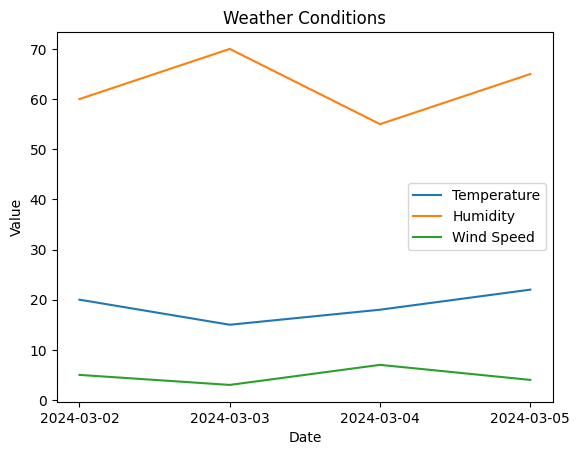

Label(value='Weather Condition: Sunny')

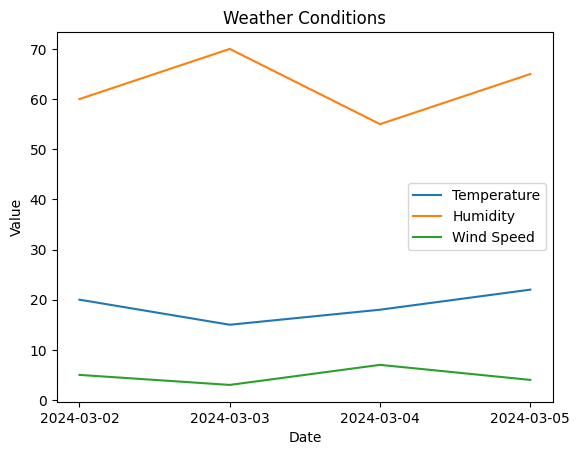

In [25]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

class Weather:
    def __init__(self, date, temperature, humidity, wind_speed, weather_condition):
        self.date = date
        self.temperature = temperature
        self.humidity = humidity
        self.wind_speed = wind_speed
        self.weather_condition = weather_condition

    def display_weather(self):
        # Create a figure and a set of subplots
        fig, ax = plt.subplots()

        # Plot the temperature
        ax.plot(self.date, self.temperature, label='Temperature')

        # Plot the humidity
        ax.plot(self.date, self.humidity, label='Humidity')

        # Plot the wind speed
        ax.plot(self.date, self.wind_speed, label='Wind Speed')

        # Set the title and labels
        ax.set_title('Weather Conditions')
        ax.set_xlabel('Date')
        ax.set_ylabel('Value')

        # Add a legend
        ax.legend()

        # Display the chart
        display(fig)

        # Display the weather condition
        display(widgets.Label(f"Weather Condition: {self.weather_condition}"))

# Create weather records
weather1 = Weather(["2024-03-02", "2024-03-03", "2024-03-04", "2024-03-05"], [20, 15, 18, 22], [60, 70, 55, 65], [5, 3, 7, 4], "Sunny")

# Display weather records
weather1.display_weather()

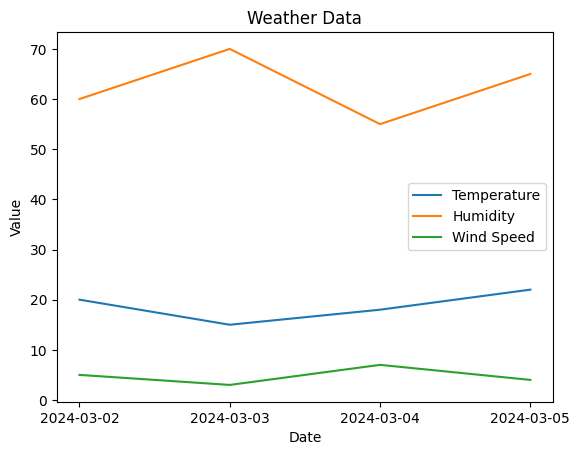

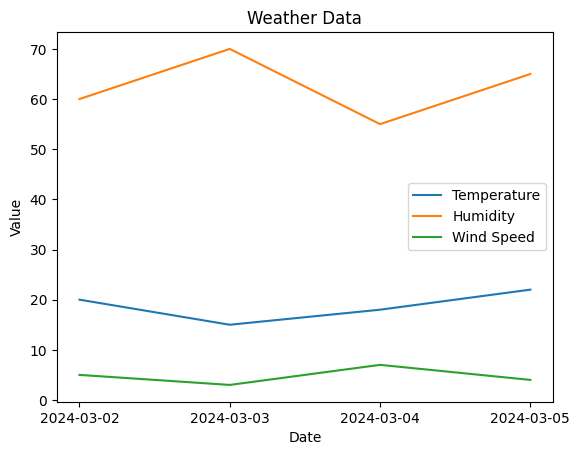

In [26]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

class Weather:
    def __init__(self, date, temperature, humidity, wind_speed, weather_condition):
        self.date = date
        self.temperature = temperature
        self.humidity = humidity
        self.wind_speed = wind_speed
        self.weather_condition = weather_condition

    def display_weather(self):
        # Create a figure and a set of subplots
        fig, ax = plt.subplots()

        # Plot the temperature
        ax.plot(self.date, self.temperature, label='Temperature')

        # Plot the humidity
        ax.plot(self.date, self.humidity, label='Humidity')

        # Plot the wind speed
        ax.plot(self.date, self.wind_speed, label='Wind Speed')

        # Set the x-axis label
        ax.set_xlabel('Date')

        # Set the y-axis label
        ax.set_ylabel('Value')

        # Set the title
        ax.set_title('Weather Data')

        # Add a legend
        ax.legend()

        # Display the plot
        display(fig)

# Create weather records
weather1 = Weather(["2024-03-02", "2024-03-03", "2024-03-04", "2024-03-05"], [20, 15, 18, 22], [60, 70, 55, 65], [5, 3, 7, 4], ["Sunny", "Cloudy", "Rainy", "Sunny"])

# Display weather records
weather1.display_weather()

In [28]:
class Character:
    def __init__(self, name, level, health, mana, strength, intelligence):
        self.name = name
        self.level = level
        self.health = health
        self.mana = mana
        self.strength = strength
        self.intelligence = intelligence

    def __str__(self):
        return f"Name: {self.name}, Level: {self.level}, Health: {self.health}, Mana: {self.mana}, Strength: {self.strength}, Intelligence: {self.intelligence}"

    def level_up(self):
        self.level += 1
        self.health += 10
        self.mana += 5
        self.strength += 2
        self.intelligence += 2

    def attack(self, enemy):
        damage = self.strength * 2
        enemy.health -= damage
        print(f"{self.name} attacks {enemy.name} for {damage} damage!")

    def cast_spell(self, enemy):
        if self.mana >= 5:
            self.mana -= 5
            damage = self.intelligence * 3
            enemy.health -= damage
            print(f"{self.name} casts a spell on {enemy.name} for {damage} damage!")
        else:
            print(f"{self.name} doesn't have enough mana to cast a spell!")

# Create a character
player = Character("Player", 1, 100, 20, 10, 15)

# Level up the character
player.level_up()

# Create an enemy
enemy = Character("Enemy", 1, 50, 10, 5, 5)

# Player attacks the enemy
player.attack(enemy)

# Player casts a spell on the enemy
player.cast_spell(enemy)

# Print the character stats
print(player)
print(enemy)

Player attacks Enemy for 24 damage!
Player casts a spell on Enemy for 51 damage!
Name: Player, Level: 2, Health: 110, Mana: 20, Strength: 12, Intelligence: 17
Name: Enemy, Level: 1, Health: -25, Mana: 10, Strength: 5, Intelligence: 5


In [29]:
class Character:
    def __init__(self, name, health, strength, intelligence):
        self.name = name
        self.health = health
        self.strength = strength
        self.intelligence = intelligence

    def is_alive(self):
        return self.health > 0

    def take_damage(self, damage):
        self.health -= damage
        if self.health < 0:
            self.health = 0

    def attack(self, other):
        other.take_damage(self.strength)

    def __str__(self):
        return f"{self.name} - Health: {self.health}, Strength: {self.strength}, Intelligence: {self.intelligence}"

# Create two characters
player = Character("Player", 100, 10, 5)
enemy = Character("Enemy", 50, 5, 10)

# Player attacks enemy
player.attack(enemy)

# Print characters' status
print(player)
print(enemy)

Player - Health: 100, Strength: 10, Intelligence: 5
Enemy - Health: 40, Strength: 5, Intelligence: 10


In [13]:
import json

class Character:
    def __init__(self, name, health, strength, intelligence):
        self.name = name
        self._health = health  # Note the use of '_' to signal private
        self._strength = strength
        self._intelligence = intelligence

    @property
    def health(self):
        return self._health

    @health.setter
    def health(self, value):
        self._health = max(0, value)  # Prevent negative health

    @property
    def strength(self):
        return self._strength

    @strength.setter
    def strength(self, value):
        self._strength = value  

    @property
    def intelligence(self):
        return self._intelligence

    @intelligence.setter
    def intelligence(self, value):
        self._intelligence = value

    def is_alive(self):
        return self.health > 0

    def take_damage(self, damage):
        self.health -= damage

    def attack(self, other):
        other.take_damage(self.strength)

    def __str__(self):
        return f"{self.name} - Health: {self.health}, Strength: {self.strength}, Intelligence: {self.intelligence}"
    
    def to_json(self):
        return json.dumps({
            "name": self.name,
            "health": self.health,
            "strength": self.strength,
            "intelligence": self.intelligence
        })
    
my_hero = Character("Sir Lancelot", 100, 15, 8)

print(my_hero.health)  # Access health like a normal attribute (output: 100)

my_hero.take_damage(20)
print(my_hero.health)  # Output: 80

my_hero.health = -10   # Health will not go below 0
print(my_hero.health)  # Output: 0

character_json = my_hero.to_json()
print(character_json) 

100
80
0
{"name": "Sir Lancelot", "health": 0, "strength": 15, "intelligence": 8}


In [31]:
import numpy as np
import lmfit as lm

# Sample Data (replace with your actual data)
x_data = np.array([1, 2, 3, 4, 5])
y_data = np.array([3, 5, 7, 9, 11]) 

# Model function
def linear_model(x, slope, intercept):
    return slope * x + intercept

# Create Parameters object (only optimizing 'slope')
params = lm.Parameters()
params.add('slope', value=1.0)  

# Fit the model 
result = lm.minimize(linear_model, params, args=(x_data, y_data))

# Get optimized parameter values and errors
best_slope = result.params['slope'].value
slope_stderr = result.params['slope'].stderr

print("Optimized Slope:", best_slope)
print("Standard Error:", slope_stderr)

Optimized Slope: -2.272727272659588
Standard Error: 0.06428243465400152


In [33]:
from scipy.optimize import minimize
x0 = 10 #initial guess
res = minimize(cost_function, x0, method='Nelder-Mead', tol=1e-6)

NameError: name 'cost_function' is not defined

In [32]:
import numpy as np
import lmfit as lm

def my_model(x, amplitude):
    return amplitude * np.exp(-x) 

x_data = np.linspace(0, 5, 20)
y_data = 2.5 * np.exp(-x_data) + np.random.normal(size=20, scale=0.2)  # Example data
params = lm.Parameters()
params.add('amplitude', value=3.0, min=0)  # Initial guess, positive amplitude 

minimizer = lm.Minimizer(my_model, params, fcn_args=(x_data, y_data))

result = minimizer.minimize()

optimal_amplitude = result.params['amplitude'].value
amplitude_stderr  = result.params['amplitude'].stderr

print(f"Optimal amplitude: {optimal_amplitude:.3f} +/- {amplitude_stderr:.3f}")

TypeError: my_model() takes 2 positional arguments but 3 were given

In [34]:
import lmfit
from lmfit import Minimizer, Parameters, report_fit
import numpy as np

def model_function(x, amplitude, center, other_fixed_param=0.5):  # Example model
    """Calculates values based on an example model.

    Args:
        x: Independent variable (data points).
        amplitude: The parameter to be optimized.
        center: Another parameter (could be fixed or optimized).
        other_fixed_param: Example of a fixed parameter (not optimized).

    Returns:
        Model values calculated using the equation.
    """

    return amplitude * np.exp(-(x - center)**2 / other_fixed_param) 

x_data = np.linspace(0, 5, 50)  # Sample x values
noise = np.random.normal(0, 0.2, size=len(x_data)) 
y_data = model_function(x_data, amplitude=2.5, center=2.0) + noise  # Add some noise to data

params = Parameters()
params.add('amplitude', value=2.0, min=0)  # Initial value, set minimum for amplitude
params.add('center', value=2.2)  # Initial value for center (could also be optimized)

minner = Minimizer(model_function, params, fcn_args=(x_data, y_data))
result = minner.least_squares()

report_fit(result)  

optimized_amplitude = result.params['amplitude'].value
amplitude_stderr = result.params['amplitude'].stderr

print("Optimized Amplitude:", optimized_amplitude)
print("Standard Error (Amplitude):", amplitude_stderr)

ValueError: operands could not be broadcast together with shapes (2,) (50,) 

In [35]:
import numpy as np

def model_function(x, amplitude):
    return amplitude * np.exp(-x / 5.0)  # Example model: exponential decay

from lmfit import Model, Parameters

# Create a Model object using your model function
model = Model(model_function) 

# Create a Parameters object with an initial guess for the amplitude
params = Parameters()
params.add('amplitude', value=5.0, min=0)  

x_data = np.array([1, 2, 3, 4, 5])
y_data = np.array([4.5, 3.0, 2.1, 1.5, 1.0])  # Example data

optimized_amplitude = result.params['amplitude'].value
amplitude_stderr = result.params['amplitude'].stderr

print("Optimized Amplitude:", optimized_amplitude)
print("Amplitude Standard Error:", amplitude_stderr)

print(result.fit_report())

import numpy as np
from lmfit import Model, Parameters

def model_function(x, amplitude):
    return amplitude * np.exp(-x / 5.0)

# Set up model and parameters
model = Model(model_function)
params = Parameters()
params.add('amplitude', value=5.0, min=0)

# Load data
x_data = np.array([1, 2, 3, 4, 5])
y_data = np.array([4.5, 3.0, 2.1, 1.5, 1.0])

# Perform fit
result = model.fit(y_data, params, x=x_data)

# Get results
optimized_amplitude = result.params['amplitude'].value
amplitude_stderr = result.params['amplitude'].stderr

print("Optimized Amplitude:", optimized_amplitude)
print("Amplitude Standard Error:", amplitude_stderr)
print(result.fit_report())

KeyError: 'amplitude'

In [5]:
import pyautogui
from PIL import Image

# Load your image 
img = Image.open("C:\\tias_tarot\\assets\\images\\tia.jpeg") 
img_width, img_height = img.size

# Get screen dimensions
screen_width, screen_height = pyautogui.size()

# Calculate center coordinates for image placement
center_x = screen_width // 2 - img_width // 2
center_y = screen_height // 2 - img_height // 2

# Take screenshot and paste image 
screenshot = pyautogui.screenshot()
screenshot.paste(img, (center_x, center_y))

In [9]:
import pyautogui
from PIL import Image

def overlay_image(image_path):
    """Overlays the image at the specified path on top of all windows."""

    image = Image.open(image_path)
    image_width, image_height = image.size
    screen_width, screen_height = pyautogui.size()

    # Center the image on the screen.
    image_x = (screen_width - image_width) // 2
    image_y = (screen_height - image_height) // 2

    # Take a screenshot of the region where you want to overlay
    screenshot = pyautogui.screenshot(region=(image_x, image_y, image_width, image_height))

    # Paste the image onto the screenshot
    screenshot.paste(image, (0, 0))

    # Overwrite the original screenshot region 
    pyautogui.screenshot(region=(image_x, image_y, image_width, image_height)).paste(screenshot) 

# Example usage:
overlay_image("C:\\tias_tarot\\assets\\images\\tia.jpeg")

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Angular Test Component</title>
    <!-- Add links to Angular scripts and styles here if needed -->
</head>
<body>
    <app-test-component></app-test-component>

    <script type="text/javascript">
        // Angular application JavaScript goes here
    </script>
</body>
</html>

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>My Website</title>
    <link rel="stylesheet" href="style.css"> </head>
<body>

    <header>
        <nav>
            <ul>
                <li><a href="#">Home</a></li>
                <li><a href="#">About</a></li>
                <li><a href="#">Contact</a></li>
            </ul>
        </nav>
    </header>

    <main>
        <section>
            <h1>Welcome to My Website!</h1>
            <p>Lorem ipsum dolor sit amet, consectetur adipiscing elit. Donec a diam lectus. Sed sit amet ipsum mauris.</p>
        </section>

        <section>
            <h2>Latest Articles</h2>
            <article>
                <h3>Article Title 1</h3>
                <p>Summary of article 1...</p>
            </article>
            <article>
                <h3>Article Title 2</h3>
                <p>Summary of article 2...</p>
            </article>
        </section>
    </main>

    <footer>
        <p>&copy; 2024 Your Name or Company</p>
    </footer>

    <script src="script.js"></script> 
</body>
</html>

In [1]:
import pygame

def polygon_collision(poly1, poly2):
    """Detects collision between two polygons.

    Args:
        poly1 (list): List of tuples representing the vertices of the first polygon.
        poly2 (list): List of tuples representing the vertices of the second polygon.

    Returns:
        bool: True if the polygons collide, False otherwise.
    """

    # Check for intersection between each edge of one polygon with all edges of the other
    for p1 in range(len(poly1)):
        p2 = (p1 + 1) % len(poly1)  # Wrap around to the next vertex
        edge1 = (poly1[p1], poly1[p2])

        for p3 in range(len(poly2)):
            p4 = (p3 + 1) % len(poly2)
            edge2 = (poly2[p3], poly2[p4])

            if lines_intersect(edge1, edge2):
                return True

    return False

def lines_intersect(edge1, edge2):
    """Helper function to determine if two line segments intersect."""
    # Implementation for line segment intersection (omitted for brevity) 
    # ... You would implement line intersection logic here
    pass 

pygame.init()
screen = pygame.display.set_mode((600, 400))

# Define polygons
polygon1 = [(100, 100), (200, 150), (150, 250)]  
polygon2 = [(300, 200), (400, 180), (350, 100)]

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    if pygame.mouse.get_pressed():
        

    screen.fill((255, 255, 255))  # Clear the screen

    # Draw polygons
    pygame.draw.polygon(screen, (0, 0, 255), polygon1)  
    pygame.draw.polygon(screen, (255, 0, 0), polygon2)  

    # Check for collision
    if polygon_collision(polygon1, polygon2):
        print('Collision detected!')

    pygame.display.flip()

pygame.quit()

pygame 2.5.2 (SDL 2.28.3, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [1]:
import pygame

def polygon_collision_demo():
    pygame.init()
    screen = pygame.display.set_mode((800, 600))
    clock = pygame.time.Clock()

    # Define the polygons as lists of points
    polygon1 = [(100, 100), (200, 50), (300, 150), (250, 250)]
    polygon2 = [(400, 200), (550, 250), (450, 350)]

    # Create surfaces and masks for the polygons
    polygon1_surface = pygame.Surface((800, 600), pygame.SRCALPHA)
    pygame.draw.polygon(polygon1_surface, (255, 0, 0), polygon1)
    polygon1_mask = pygame.mask.from_surface(polygon1_surface)

    polygon2_surface = pygame.Surface((800, 600), pygame.SRCALPHA)
    pygame.draw.polygon(polygon2_surface, (0, 0, 255), polygon2)
    polygon2_mask = pygame.mask.from_surface(polygon2_surface)

    running = True
    while running:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False

        # Move the second polygon with the mouse
        polygon2 = [(pygame.mouse.get_pos()[0] + x, pygame.mouse.get_pos()[1] + y) for x, y in polygon2]
        polygon2_surface.fill((0, 0, 0, 0))  # Clear the surface
        pygame.draw.polygon(polygon2_surface, (0, 0, 255), polygon2)
        polygon2_mask = pygame.mask.from_surface(polygon2_surface)

        # Check for collision
        offset = (polygon2[0][0] - polygon1[0][0], polygon2[0][1] - polygon1[0][1])
        if polygon1_mask.overlap(polygon2_mask, offset):
            print("Collision detected!")

        # Draw the polygons
        screen.fill((255, 255, 255))
        screen.blit(polygon1_surface, (0, 0))
        screen.blit(polygon2_surface, (0, 0))

        pygame.display.flip()
        clock.tick(60)

if __name__ == "__main__":
    polygon_collision_demo()

pygame 2.5.2 (SDL 2.28.3, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


: 

In [2]:
import discord
from discord.ext import commands
import csv

class MentionMonitor(commands.Cog):
    def __init__(self, bot):
        self.bot = bot
        self.mentions = []

    @commands.Cog.listener()
    async def on_message(self, message):
        if self.bot.user in message.mentions:
            self.mentions.append([message.author.id, message.author.name, message.channel.id, message.channel.name, message.content, message.created_at])
            with open('mentions.csv', 'a', newline='') as file:
                writer = csv.writer(file)
                writer.writerow([message.author.id, message.author.name, message.channel.id, message.channel.name, message.content, message.created_at])

    @commands.command()
    async def show_mentions(self, ctx):
        with open('mentions.csv', 'r') as file:
            reader = csv.reader(file)
            for mention in reader:
                await ctx.send(f'{mention[1]} mentioned me in {mention[3]}')

bot = commands.Bot(command_prefix='!')

@bot.event
async def on_ready():
    print(f'Logged in as {bot.user.name}')

bot.add_cog(MentionMonitor(bot))
bot.run('YOUR_TOKEN')

ModuleNotFoundError: No module named 'discord'

In [5]:
import feedparser

def subscribe_to_rss(url):
    # Parse the RSS feed
    feed = feedparser.parse(url)

    # Print the feed entries
    for entry in feed.entries:
        print(entry.title)
        print(entry.link)
        print(entry.published)
        print("-----------")

subscribe_to_rss('http://www.example.com/rss')

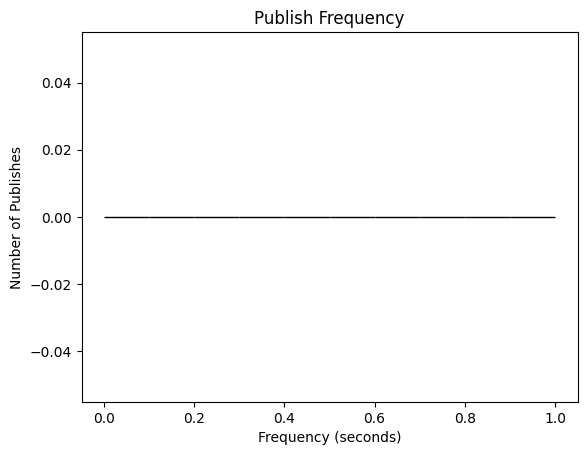

In [6]:
import feedparser
import csv
import matplotlib.pyplot as plt

def subscribe_to_rss(url, filename):
    # Parse the RSS feed
    feed = feedparser.parse(url)

    # Open a CSV file in write mode
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)

        # Write the header row
        writer.writerow(["Title", "Link", "Published"])

        # Write the feed entries
        for entry in feed.entries:
            writer.writerow([entry.title, entry.link, entry.published])

# Usage
subscribe_to_rss('http://www.example.com/rss', 'rss_feed.csv')

def plot_publish_frequency(filename):
    # Open the CSV file
    with open(filename, 'r') as csvfile:
        reader = csv.reader(csvfile)

        # Skip the header row
        next(reader)

        # Read the publish dates and convert them to datetime objects
        publish_dates = []
        for row in reader:
            publish_dates.append(datetime.strptime(row[2], '%Y-%m-%d %H:%M:%S'))

        # Calculate the publish frequency
        publish_frequency = []
        for i in range(1, len(publish_dates)):
            publish_frequency.append((publish_dates[i] - publish_dates[i-1]).total_seconds())

        # Plot the publish frequency
        plt.hist(publish_frequency, bins=10, edgecolor='black')
        plt.xlabel('Frequency (seconds)')
        plt.ylabel('Number of Publishes')
        plt.title('Publish Frequency')
        plt.show()

# Usage
plot_publish_frequency('rss_feed.csv')

C:\Users\joshb\AppData\Local\Temp\ipykernel_29336\2552219133.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


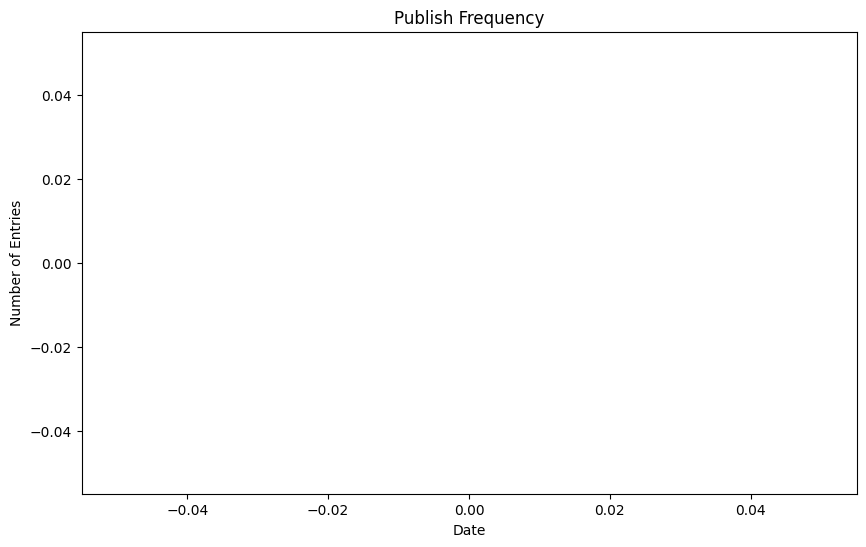

In [7]:
import feedparser
import csv
import matplotlib.pyplot as plt
import pandas as pd

def subscribe_to_rss(url):
    # Parse the RSS feed
    feed = feedparser.parse(url)

    # Save the feed data to a CSV file
    with open('feed_data.csv', 'w', newline='') as csvfile:
        fieldnames = ['title', 'link', 'published']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        for entry in feed.entries:
            writer.writerow({'title': entry.title, 'link': entry.link, 'published': entry.published})

def plot_publish_frequency():
    # Read the CSV file
    df = pd.read_csv('feed_data.csv')

    # Count the number of entries per day
    df['published'] = pd.to_datetime(df['published'])
    publish_frequency = df['published'].dt.date.value_counts().sort_index()

    # Plot the publish frequency
    plt.figure(figsize=(10, 6))
    plt.plot(publish_frequency.index, publish_frequency.values)
    plt.xlabel('Date')
    plt.ylabel('Number of Entries')
    plt.title('Publish Frequency')
    plt.show()

# Usage
subscribe_to_rss('http://www.example.com/rss')
plot_publish_frequency()

In [8]:
import pandas as pd
from scipy.stats import pearsonr

def find_correlations(csv_file):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file)

    # Calculate the correlation between the specified columns
    correlation_results = {}
    for column1 in ['item', 'quantity', 'purchase_time', 'price']:
        for column2 in ['item', 'quantity', 'purchase_time', 'price']:
            if column1 != column2:
                correlation_results[(column1, column2)] = pearsonr(df[column1], df[column2])[0]

    return correlation_results

# Test the function
print(find_correlations('orders.csv'))

FileNotFoundError: [Errno 2] No such file or directory: 'orders.csv'